*Imports*

In [160]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import seaborn as sns
import re

*READING FILE*

In [161]:
df = pd.read_csv('ARABIC-NEWS-MERGED-CLASS-COLLECTED.csv')

In [162]:
df.head()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction
0,54 عاما في القضاء.. نهاية حزينة لمعركة مقدسي ح...,real,politics,df1,NaN,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...,NaN
1,خبراء إيرانيون يشرحون لماذا لا تستعجل طهران با...,real,politics,df1,NaN,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...,NaN
2,فلسطيني يقود فريق خبراء بإيطاليا لبناء قضية إب...,real,politics,df1,NaN,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...,NaN
3,مستوطنون يهاجمون قرى نابلس بحماية من جنود الاح...,real,politics,df1,NaN,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...,NaN
4,جدل قانوني حول ترشح جاكوب زوما لانتخابات جنوب ...,real,politics,df1,NaN,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...,NaN


In [163]:
df.describe()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction
count,12032,55149,49037,56055,10618,49973,2465
unique,7648,12,86,8,5318,12471,2419
top,اليمن -Yemen حملة COVID-19 vs F19,زائف,رياضة,df3,2024-04-12T01:59:53+03:00,[],['']
freq,200,37764,17035,37784,342,150,38


In [164]:
# Replace empty strings ('[]' and "['']") with NaN
df['Article_content'] = df['Article_content'].replace(['[]', "['']"], np.nan)
df['Article_correction'] = df['Article_correction'].replace(['[]', "['']"], np.nan)


In [165]:
# Replace 'df' with the name of your DataFrame if it's different

# Check if Article_content contains the specified text
df['contains_text'] = df['Article_content'].str.contains('تابع الجزيرة نت على', na=False)

# Set Label to 'real' where contains_text is True and Label is nan
df.loc[df['contains_text'] & df['Label'].isna(), 'Label'] = 'real'

# Drop the temporary column
df.drop(columns=['contains_text'], inplace=True)

In [166]:
print("Distinct Labels Count:\n", df['Label'].value_counts(dropna=False))

Distinct Labels Count:
 Label
زائف         37764
fake          9439
real          5582
مضلل          1268
NaN            906
صحيح           844
زائف جزئي      135
رأي             38
ساخر            27
reel            26
اشاعة           12
إشاعة           12
مفبرك            2
Name: count, dtype: int64


In [167]:
df.describe()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction
count,12032,55149,49037,56055,10618,49823,2418
unique,7648,12,86,8,5318,12470,2417
top,اليمن -Yemen حملة COVID-19 vs F19,زائف,رياضة,df3,2024-04-12T01:59:53+03:00,لا صحة لخبر وفاة المدرب البرازيلي جورفان فييرا,['وصل الدين الخارجي لمصر في يونيو 2013، نهاية ...
freq,200,37764,17035,37784,342,125,2


In [168]:
df.head()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction
0,54 عاما في القضاء.. نهاية حزينة لمعركة مقدسي ح...,real,politics,df1,NaN,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...,NaN
1,خبراء إيرانيون يشرحون لماذا لا تستعجل طهران با...,real,politics,df1,NaN,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...,NaN
2,فلسطيني يقود فريق خبراء بإيطاليا لبناء قضية إب...,real,politics,df1,NaN,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...,NaN
3,مستوطنون يهاجمون قرى نابلس بحماية من جنود الاح...,real,politics,df1,NaN,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...,NaN
4,جدل قانوني حول ترشح جاكوب زوما لانتخابات جنوب ...,real,politics,df1,NaN,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...,NaN


*ExtractING distinct values*

In [169]:
#LABEL
distinct_Label = df['Label'].unique()
print("Distinct Labels:", distinct_Label)

Distinct Labels: ['real' 'fake' 'reel' nan 'زائف' 'صحيح' 'اشاعة' 'مضلل' 'مفبرك' 'زائف جزئي'
 'ساخر' 'رأي' 'إشاعة']


In [170]:
#TOPIC
distinct_Topic = df['Topic'].unique()
print("Distinct Topic:", distinct_Topic)

Distinct Topic: ['politics' 'business' 'culture' 'sport' 'tech' 'opinion' 'turath' 'arts'
 'science' 'midan' 'lifestyle' 'family' 'Science and Technology' 'Sport'
 'Economic' 'middle-east' 'travel' 'science-and-health' 'entertainment'
 'style' 'world' 'Politics' 'Sports' 'Religion' 'Tech' 'Culture' 'Finance'
 'Medical' 'Social' 'Economy' 'Technology' 'Science' 'news' 'health'
 'Health' 'Other' 'Business' 'أخبار' 'ترفيه' 'تكنولوجيا' 'ثقافة وفن'
 'رياضة' 'سياسة' 'صحة' 'موسيقى' 'دينية, سياسي' nan 'سياسي' 'دينية'
 'اجتماعية, سياسي' 'زائف' 'مضلل' 'نفسي' 'تنس' 'جهاز' 'رئيس' 'حكومة' 'وباء'
 'مباراة' 'تصويت' 'مستشفى' 'شبكة' 'تقنية' 'لعبة' 'علاج' 'برلمان' 'إنترنت'
 'انتخابات' 'دواء' 'فريق' 'برمجة' 'قرار' 'ابتكار' 'تحديث' 'ذكاء اصطناعي'
 'طب' 'جائزة' 'كرة القدم' 'تغذية' 'مدرب' 'تطبيق' 'صحي' 'قانون' 'مرض'
 'بطولة' 'ديمقراطية' 'رياضي']


*VISUALISATION OF COLUMNS DISTRIBUTIONS*

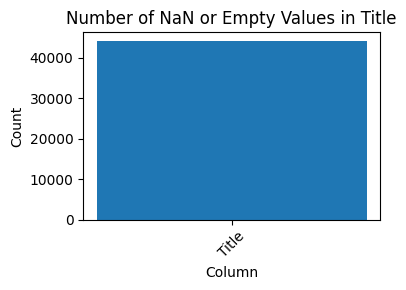

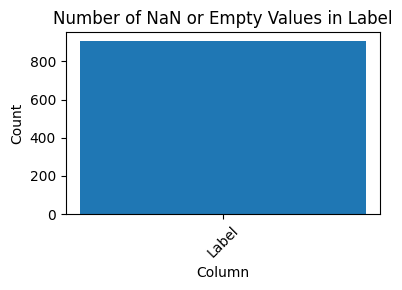

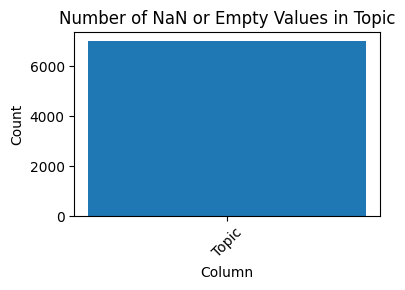

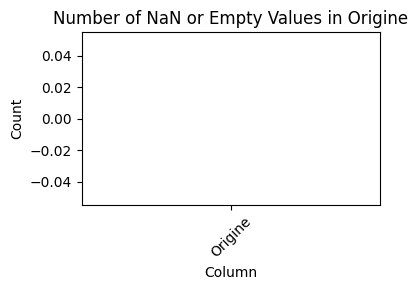

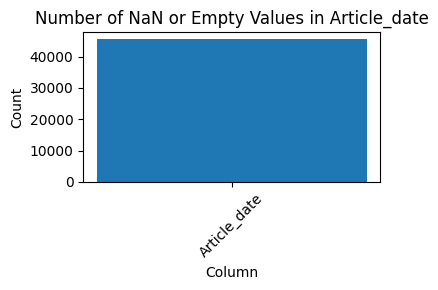

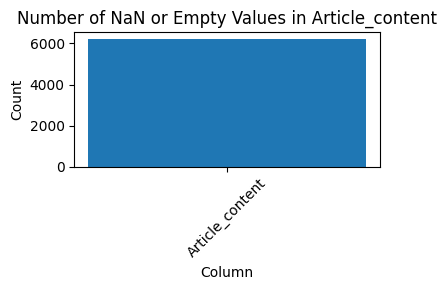

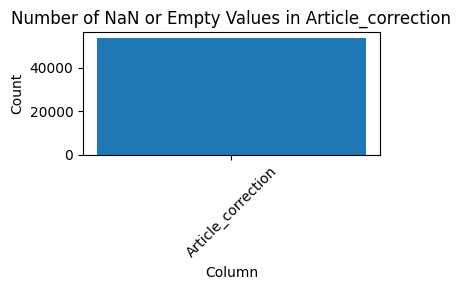

In [171]:
# Plot the statistics for each column
for column in df.columns:
    nan_count = df[column].isna().sum()
    plt.figure(figsize=(4, 3))
    plt.bar(column, nan_count)
    plt.title(f'Number of NaN or Empty Values in {column}')
    plt.xlabel('Column')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

*UNIFYING THE LABEL VALUES*

In [172]:
# Map 'صحيح' to 'True' and all other values to 'Fake', keeping 'nan' as is
legitimacy_mapping = {
    'صحيح': 'real',
    'اشاعة': 'fake',
    'مضلل': 'fake',
    'زائف': 'fake',
    'مفبرك': 'fake',
    'زائف جزئي': 'fake',
    'ساخر': 'fake',
    'رأي': 'fake',
    'reel' : 'real',
    'real' : 'real',
    'fake' : 'fake',
}

# Map legitimacy values
df['Label'] = df['Label'].map(legitimacy_mapping)

In [173]:
#LABEL
distinct_Label = df['Label'].unique()
print("Distinct Labels:", distinct_Label)

Distinct Labels: ['real' 'fake' nan]


In [174]:

print("Distinct Labels Count:\n", df['Label'].value_counts(dropna=False))

Distinct Labels Count:
 Label
fake    48685
real     6452
NaN       918
Name: count, dtype: int64


*UNIFYING THE TOPIC VALUES*

In [175]:
# Define a dictionary to map distinct topics to unified categories
topic_map = {
    'politics': 'politics',
    'business': 'business',
    'culture': 'culture',
    'sport': 'sport',
    'tech': 'technology',
    'opinion': 'opinion',
    'turath': 'culture',
    'arts': 'culture',
    'science': 'science',
    'midan': 'politics',
    'lifestyle': 'lifestyle',
    'family': 'lifestyle',
    'science and technology': 'science',
    'economic': 'business',
    'middle-east': 'world',
    'travel': 'lifestyle',
    'science-and-health': 'science',
    'entertainment': 'entertainment',
    'style': 'lifestyle',
    'world': 'world',
    'religion': 'culture',
    'finance': 'business',
    'medical': 'science',
    'social': 'lifestyle',
    'economy': 'business',
    'news': 'world',
    'health': 'science',
    'other': 'other',
    'أخبار': 'world',
    'ترفيه': 'entertainment',
    'تكنولوجيا': 'technology',
    'ثقافة وفن': 'culture',
    'رياضة': 'sport',
    'سياسة': 'politics',
    'صحة': 'science',
    'موسيقى': 'entertainment',
    'دينية, سياسي': 'religion',
    'سياسي': 'politics',
    'دينية': 'religion',
    'اجتماعية, سياسي': 'politics',
    'زائف': 'other',
    'مضلل': 'other',
    'نفسي': 'other',
    'تنس': 'sport',
    'جهاز': 'technology',
    'رئيس': 'politics',
    'حكومة': 'politics',
    'وباء': 'science',
    'مباراة': 'sport',
    'تصويت': 'politics',
    'مستشفى': 'health',
    'شبكة': 'technology',
    'لعبة': 'entertainment',
    'علاج': 'health',
    'برلمان': 'politics',
    'إنترنت': 'technology',
    'انتخابات': 'politics',
    'دواء': 'health',
    'فريق': 'sport',
    'برمجة': 'technology',
    'قرار': 'politics',
    'ابتكار': 'technology',
    'تحديث': 'technology',
    'ذكاء اصطناعي': 'technology',
    'طب': 'health',
    'جائزة': 'other',
    'كرة القدم': 'sport',
    'تغذية': 'health',
    'مدرب': 'sport',
    'تطبيق': 'technology',
    'صحي': 'health',
    'قانون': 'politics',
    'مرض': 'health',
    'بطولة': 'sport',
    'ديمقراطية': 'politics',
    'رياضي': 'sport',
}

# Map TOPIC values
df['Topic'] = df['Topic'].map(topic_map)


In [176]:
#TOPIC
distinct_Topic = df['Topic'].unique()
print("Distinct Topic:", distinct_Topic)

Distinct Topic: ['politics' 'business' 'culture' 'sport' 'technology' 'opinion' 'science'
 'lifestyle' nan 'world' 'entertainment' 'religion' 'other' 'health']


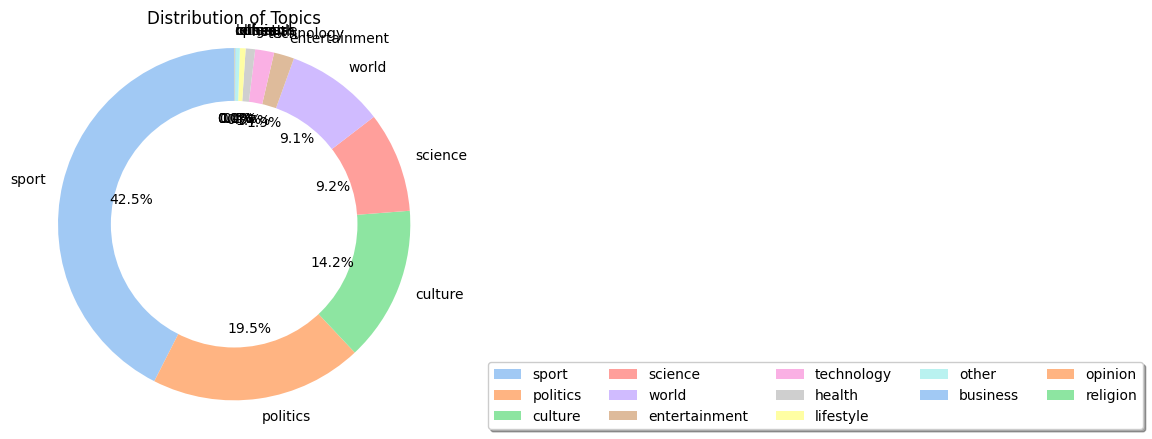

In [177]:
# Assuming distinct_Topic contains the unique topics
distinct_Topic = df['Topic'].unique()

# Count the occurrences of each topic in the DataFrame
topic_counts = df['Topic'].value_counts()

# Create a color palette with pastel colors
pastel_colors = sns.color_palette("pastel", len(topic_counts))

# Create a doughnut chart
plt.figure(figsize=(5, 5))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=90,colors=pastel_colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(loc="lower center", bbox_to_anchor=(2, -0.05), fancybox=True, shadow=True, ncol=5)

plt.title('Distribution of Topics')
plt.axis('equal')
plt.show()

*HANDELING THE MISSING VALUES FOR EACH COLUMN/LINE*

In [178]:
# Define a function to clean Arabic text
def clean_arabic_text(text):
    # Remove links
    text = re.sub(r'http\S+', '', text)
    # Remove emojis
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    # Remove URLs
    text = re.sub(r'www\.\S+|https?://\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove unnecessary spaces
    text = ' '.join(text.split())
    return text

# Apply the cleaning function to the 'Article_content' & 'Article_correction' columns
df['Article_content_cleaned'] = df['Article_content'].astype(str).apply(clean_arabic_text)
df['Article_correction_cleaned'] = df['Article_correction'].astype(str).apply(clean_arabic_text)

*PRINTING THE Article_content COLUMN TO CHECK THE TEXT CLEANING*

In [179]:
# Set display options to show entire text - ENABLE IF YOU WANT TO DISPLAY ENTIRE TEXT
#pd.set_option('display.max_colwidth', None)

filtered_df = df[df['Article_content_cleaned'].notnull()]

# Print the first 10 rows of the 'Article_content' column where it is not NaN
print(filtered_df['Article_content_cleaned'].head(10))

0    القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1    طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2    غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3    نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4    بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...
5    يرى الخبير العسكري والإستراتيجي العقيد ركن حات...
6    بغداد- في خطوة مفاجئة وخلال أيام عيد الفطر، أع...
7    تركز كثير من انتقادات الغرب لإسرائيل على رئيس ...
8    لومي- في تطور سياسي مثير تشهده جمهورية توغو، ق...
9    بعد عام من القتال الذي اندلع في العاصمة السودا...
Name: Article_content_cleaned, dtype: object


In [180]:
#pd.set_option('display.max_colwidth', 50)
df.head() 

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction,Article_content_cleaned,Article_correction_cleaned
0,54 عاما في القضاء.. نهاية حزينة لمعركة مقدسي ح...,real,politics,df1,NaN,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...,NaN,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...,nan
1,خبراء إيرانيون يشرحون لماذا لا تستعجل طهران با...,real,politics,df1,NaN,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...,NaN,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...,nan
2,فلسطيني يقود فريق خبراء بإيطاليا لبناء قضية إب...,real,politics,df1,NaN,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...,NaN,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...,nan
3,مستوطنون يهاجمون قرى نابلس بحماية من جنود الاح...,real,politics,df1,NaN,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...,NaN,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...,nan
4,جدل قانوني حول ترشح جاكوب زوما لانتخابات جنوب ...,real,politics,df1,NaN,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...,NaN,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...,nan


*DATA AUGMENTATION*

### DO NOT EXECUTE THIS 

In [181]:
""" 
from googletrans import Translator  # for back translation (requires installation)


# Function for back translation using Google Translate
def back_translate(text, src_lang='ar', dest_lang='en'):
    translator = Translator()
    translation = translator.translate(text, src=src_lang, dest=dest_lang)
    back_translation = translator.translate(translation.text, src=dest_lang, dest=src_lang)
    return back_translation.text

# Function for data augmentation
def augment_data(df):
    augmented_data = []

    for index, row in df.iterrows():
        # Original data
        original_text = row['Article_content']
        original_topic = row['Topic']
        original_label = row['Label']

        # Augment the data
        # Example: back translation
        augmented_text = back_translate(original_text, src_lang='ar', dest_lang='en')
        augmented_topic = original_topic  # You can apply augmentation techniques for topics as well
        augmented_label = original_label  # Label can be changed to 'fake' for augmented data

        # Append the augmented data to the list
        augmented_data.append({
            'Title': row['Title'],
            'Label': augmented_label,
            'Topic': augmented_topic,
            'Origine': row['Origine'],
            'Article_date': row['Article_date'],
            'Article_content': augmented_text,
            'Article_correction': row['Article_correction']
        })

    return pd.DataFrame(augmented_data)

# Augment the data
augmented_df = augment_data(df)

# Concatenate original and augmented data
combined_df = pd.concat([df, augmented_df], ignore_index=True)

# Shuffle the combined DataFrame
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

# Print the combined DataFrame
print(combined_df)
"""

" \nfrom googletrans import Translator  # for back translation (requires installation)\n\n\n# Function for back translation using Google Translate\ndef back_translate(text, src_lang='ar', dest_lang='en'):\n    translator = Translator()\n    translation = translator.translate(text, src=src_lang, dest=dest_lang)\n    back_translation = translator.translate(translation.text, src=dest_lang, dest=src_lang)\n    return back_translation.text\n\n# Function for data augmentation\ndef augment_data(df):\n    augmented_data = []\n\n    for index, row in df.iterrows():\n        # Original data\n        original_text = row['Article_content']\n        original_topic = row['Topic']\n        original_label = row['Label']\n\n        # Augment the data\n        # Example: back translation\n        augmented_text = back_translate(original_text, src_lang='ar', dest_lang='en')\n        augmented_topic = original_topic  # You can apply augmentation techniques for topics as well\n        augmented_label = ori